# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [867]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import plotly.express as px

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [868]:
print("Для воспроизводимости результатов")

Для воспроизводимости результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [869]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [870]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [871]:
print('Первые 5 строк тестового датасета: ')
display(df_test.head(5))

print('Последние 5 строк тестового датасета: ')
display(df_test.tail(5))

Первые 5 строк тестового датасета: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


Последние 5 строк тестового датасета: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [872]:
print('Cтатистики по числовым столбцам для трейна:')
display(df_train.describe())

print('Cтатистики по числовым столбцам для теста:')
display(df_test.describe())

print('Cтатистики по категориальным столбцам для трейна:')
display(df_train.describe(include=object))

print('Cтатистики по категориальным столбцам для теста:')
display(df_test.describe(include=object))

Cтатистики по числовым столбцам для трейна:


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Cтатистики по числовым столбцам для теста:


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


Cтатистики по категориальным столбцам для трейна:


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


Cтатистики по категориальным столбцам для теста:


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [873]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Можем увидеть, что в трейне пропуски есть в колонках `mileage`, `engine`, `max_power`, `torque`, `seats`

Посмотрим на количество таких пропусков

In [874]:
na_counts = df_train.isnull().sum()
na_counts[na_counts>0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [875]:
na_counts = df_test.isnull().sum()
na_counts[na_counts>0]

mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

Вывели количество пропущенных знчений в трейне и тесте. Колонки идентичны

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [876]:
# найдем полные дубликаты по всем колонкам, кроме selling_price
dupl_columns = list(df_train.columns)
dupl_columns.remove('selling_price')
duplicates = df_train[df_train.duplicated(subset=dupl_columns)]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [877]:
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [878]:
# дополнительных действий перед drop_duplicates совершать не нужно, метод и так оставлет первую строку
df_train.drop_duplicates(subset=dupl_columns, inplace=True);

In [879]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [880]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [881]:
# удаляем единицы измерения
def delete_measure_units(df: pd.DataFrame, columns: List[str]):
    for column in columns:
        df[column] = df[column].str.extract('(\d+\.?\d+ )').astype(float)

columns = ['mileage', 'engine', 'max_power']
delete_measure_units(df_train, columns)
delete_measure_units(df_test, columns)

In [882]:
# попробуем разбить признак torque на 2 и посмотреть на результат
def get_torque_coef(torque_string):
    if not isinstance(torque_string, str):
        return 1
    torque_lower = torque_string.lower()
    if 'nm' in torque_lower or not 'kgm' in torque_lower:
        return 1

    return 9.80665

def split_torque(df):
    df['max_torque_rpm'] = df['torque'].str.extract('\D(\d+,?\d+)\D*$')
    df['max_torque_rpm'] = df['max_torque_rpm'].str.replace(',', '').astype(float)
    torque_coef = df['torque'].apply(get_torque_coef)
    df['torque_2'] = df['torque'].str.extract('^(\d+\.?\d*)').astype(float)
    df['torque_2'] = df['torque_2'] * torque_coef

split_torque(df_train)
split_torque(df_test)

Посмотрим на распределение новой колонки torque_2

In [883]:
def create_hist(df, feature):
    plt.figure(figsize=(6, 3))
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

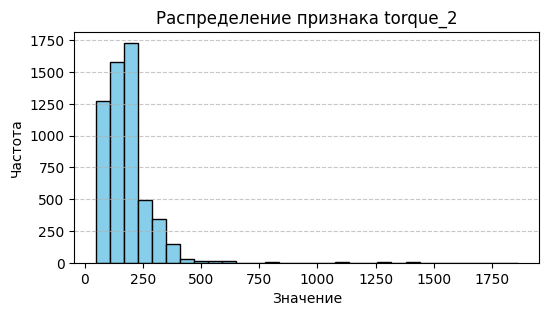

In [884]:
create_hist(df_train, 'torque_2')

Видим подозрительные значения > 750. Проверим, не ошибки ли это

In [885]:
df_train[df_train['torque_2']>1000].groupby(['name', 'torque','torque_2'], as_index=False).year.max()

,name,torque,torque_2,year
0,Ford Ikon 1.6 EXi NXt,130@ 2500(kgm@ rpm),1274.86450,2003
1,Ford Ikon 1.6 Nxt,130@ 2500(kgm@ rpm),1274.86450,2009
2,Mahindra Logan Petrol 1.4 GLE,"110@ 3,000(kgm@ rpm)",1078.73150,2010
3,Maruti SX4 Vxi BSIII,"145@ 4,100(kgm@ rpm)",1421.96425,2009
4,Maruti SX4 Zxi BSIII,"145@ 4,100(kgm@ rpm)",1421.96425,2010
5,Maruti SX4 Zxi with Leather BSIII,"145@ 4,100(kgm@ rpm)",1421.96425,2008
6,Tata Sumo CX 10 Str BSIV,"115@ 2,500(kgm@ rpm)",1127.76475,2011
7,Tata Sumo CX 9 Seater,"115@ 2,500(kgm@ rpm)",1127.76475,2008
8,Tata Sumo EX 10/7 Str BSIII,"115@ 2,500(kgm@ rpm)",1127.76475,2012
9,Tata Sumo EX TC,"190@ 21,800(kgm@ rpm)",1863.26350,2005


При поиске информации об этих автомобилях оказалось, что единицы указаны неверно.

Изменим наш метод

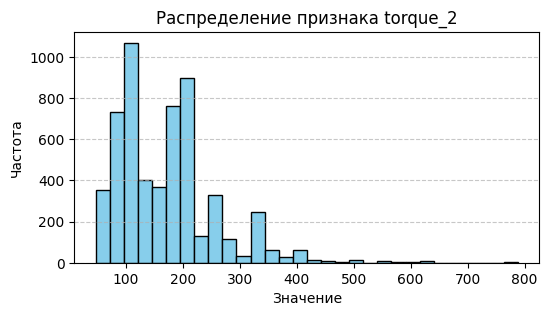

In [886]:
def get_torque_coef(row):
    if not isinstance(row['torque'], str):
        return 1

    torque_lower = row['torque'].lower()
    if 'nm' in torque_lower or not 'kgm' in torque_lower:
        return 1

    if row['torque_2'] > 100:
        return 1

    return 9.80665

def split_torque(df):
    df['max_torque_rpm'] = df['torque'].str.extract('\D(\d+,?\d+)\D*$')
    df['max_torque_rpm'] = df['max_torque_rpm'].str.replace(',', '').astype(float)
    df['torque_2'] = df['torque'].str.extract('^(\d+\.?\d*)').astype(float)
    torque_coef = df.apply(get_torque_coef, axis=1)
    df['torque_2'] = df['torque_2'] * torque_coef

split_torque(df_train)
split_torque(df_test)

create_hist(df_train, 'torque_2')

In [887]:
df_train[df_train['torque_2']>=450].groupby(['name', 'torque','torque_2'], as_index=False).year.max()

,name,torque,torque_2,year
0,Audi Q5 3.0 TDI Quattro,580Nm@ 1400-3250rpm,580.000000,2014
1,Audi Q5 45 TDI quattro Technology,580Nm@ 1400-3250rpm,580.000000,2015
2,Audi Q7 3.0 TDI Quattro,550Nm@ 1750-2750rpm,550.000000,2014
3,Audi Q7 3.0 TDI Quattro Premium Plus,550Nm@ 1750-2750rpm,550.000000,2012
4,Audi Q7 35 TDI Quattro Premium,550Nm@ 1750-2750rpm,550.000000,2015
5,BMW 5 Series 530d,"51@ 1,750-3,000(kgm@ rpm)",500.139150,2013
6,BMW 6 Series GT 630d Luxury Line,620Nm@ 2000-2500rpm,620.000000,2018
7,BMW 7 Series 730Ld,560Nm@ 1500rpm,560.000000,2010
8,BMW X6 xDrive30d,540Nm@ 2000rpm,540.000000,2013
9,BMW X7 xDrive 30d DPE,620Nm@ 1500-2500rpm,620.000000,2020


Это уже больше похоже на правду

In [888]:
df_train.drop('torque', axis=1, inplace=True)
df_train.rename(columns={'torque_2': 'torque'}, inplace=True)
df_test.drop('torque', axis=1, inplace=True)
df_test.rename(columns={'torque_2': 'torque'}, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [889]:
na_counts = df_train.isnull().sum()
na_columns = na_counts[na_counts>0].index
for column in na_columns:
    median = df_train[column].median()
    df_train[column] = df_train[column].fillna(median)
    df_test[column] = df_test[column].fillna(median)

na_counts = df_test.isnull().sum()
na_columns = na_counts[na_counts>0].index
for column in na_columns:
    median = df_train[column].median()
    df_test[column] = df_test[column].fillna(median)

Проверим, что пропущенных значений не осталось

In [890]:
na_counts = df_train.isnull().sum()
na_counts[na_counts>0]

Series([], dtype: int64)

In [891]:
na_counts = df_test.isnull().sum()
na_counts[na_counts>0]

Series([], dtype: int64)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [892]:
df_train.seats.value_counts()

5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [893]:
print("""
    Между стоимостью автомобиля и количеством сидений может быть сложная зависимость.
    Например, наиболее высокая стоимость может быть как у спорткаров с 2-мя сидениями,
    так и у автомобилей с большим количеством сидений.
    Количество сидений скорее характеризует тип автомобиля.
""")


    Между стоимостью автомобиля и количеством сидений может быть сложная зависимость.
    Например, наиболее высокая стоимость может быть как у спорткаров с 2-мя сидениями,
    так и у автомобилей с большим количеством сидений.
    Количество сидений скорее характеризует тип автомобиля.



In [894]:
def change_type(df: pd.DataFrame, columns: List[str], type: type):
    for column in columns:
        df[column] = df[column].astype(type)

columns = ['engine', 'seats']
change_type(df_train, columns, int)
change_type(df_test, columns, int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

Определим несколько функций, чтобы не дублировать код

In [895]:
def creating_bar(df, feature):
    df_grouped = df.groupby(feature, as_index=False).mean('selling_price')
    fig = px.bar(
        data_frame=df_grouped,
        x=df_grouped[feature].astype('str'),
        y='selling_price',
        title=f'Зависимость средней цены от признака {feature}',
        color=df_grouped[feature].astype('str'),
        color_discrete_sequence=px.colors.qualitative.Bold,
        width=1000
    )
    fig.show()


def create_pairplot(df, columns=None):
    df_for_plot = df[columns] if columns else df
    sns.pairplot(df_for_plot)
    plt.show()


def create_scatterplot(df, x, y, hue=None):
    plt.figure(figsize=(9, 4))

    scatterplot = sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        s=70,
    )
    scatterplot.set_title(f'Взаимосвязь признаков {x} и {y}', fontsize=16)
    scatterplot.set_xlabel(x)
    scatterplot.set_ylabel(y);

    plt.show()

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

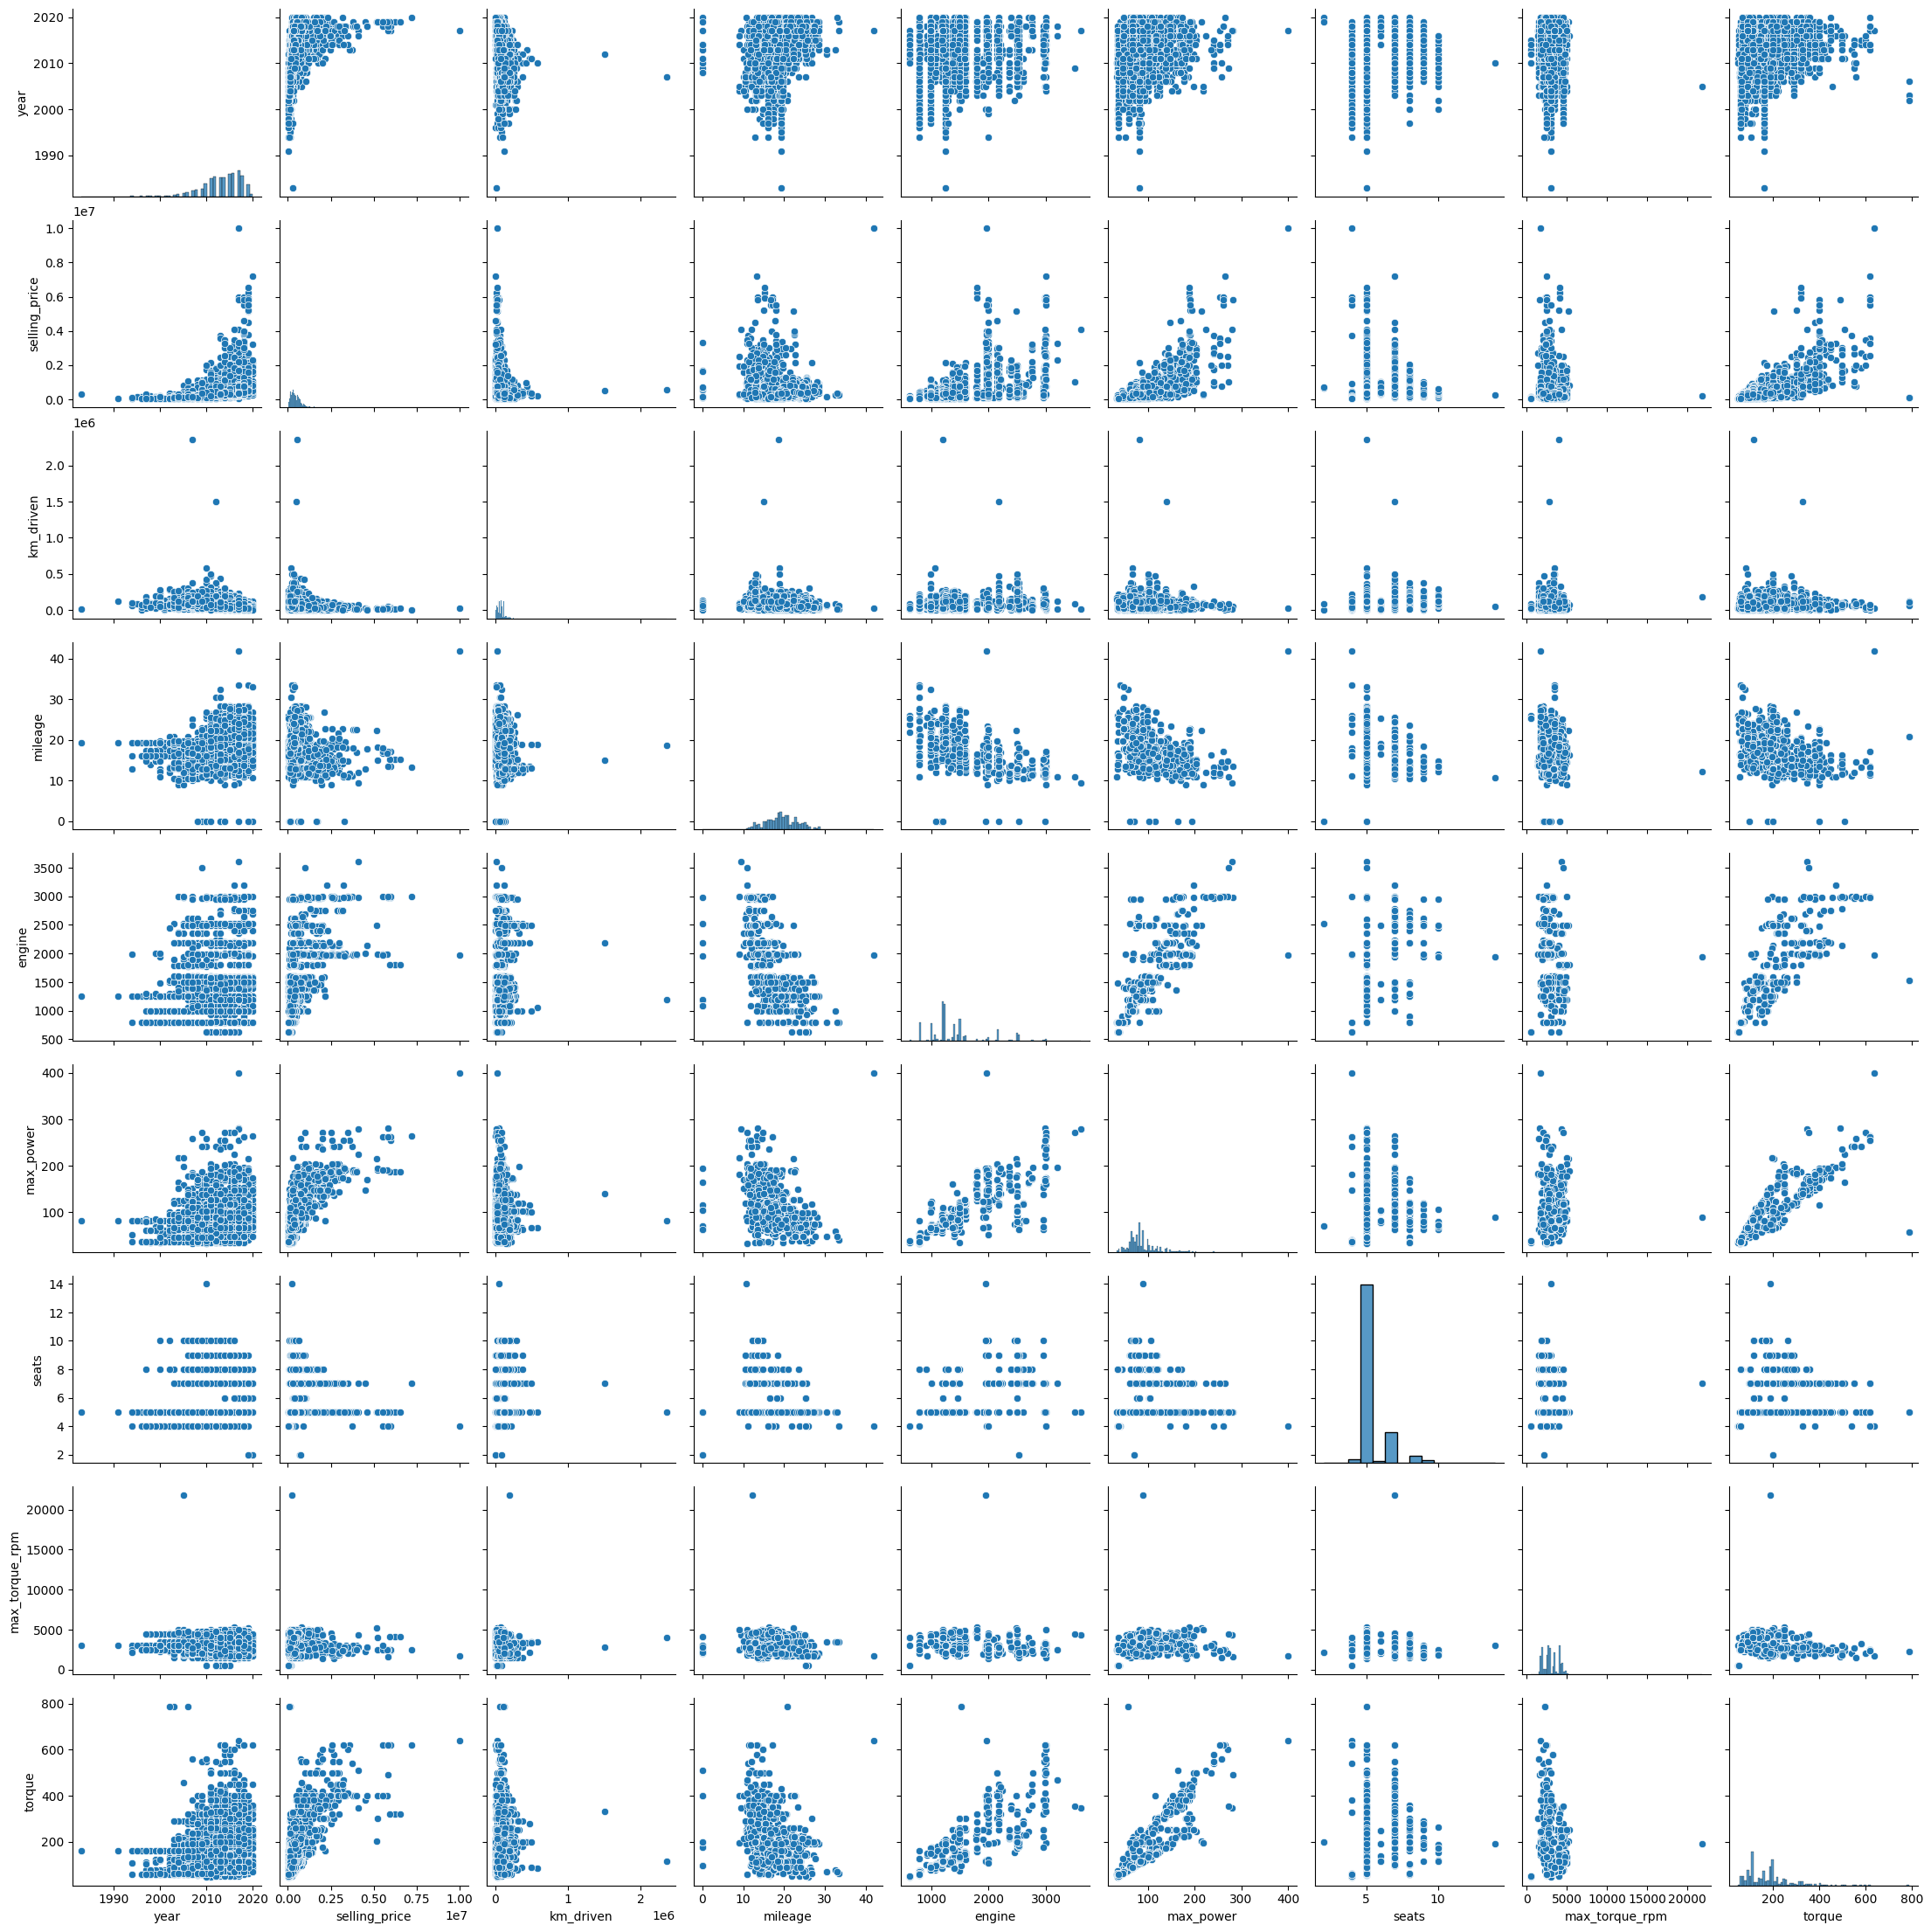

In [896]:
create_pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Признаков слишком много для наглядности графика. В таком масштабе его сложно интерпретировать. Можно построить график для определенного набора колонок. Но нам сейчас требуются все попарные корреляции.

На графике видна зависимость целевой переменной (стоимости) от признаков `max_power` и `torque`. Наблюдается менее явная зависимость стоимости от признака `engine`. Также есть не очень явные нелинейные зависимости признаков `year` (прямая) и `km_driven` (обратная) и целевой переменной.

Несмотря на наши предположения, дорогие экземпляры чаще встречаются среди автомобилей с 4,5 и 7 сидениями. Признак `seats` можно было исключить из данного графика и построить для него столбчатую диаграмму.

Также мы видим некоторые выбросы в данных. Например, в признаках `km_driven`, `max_torque_rpm`, `milleage`, `selling_price`. Выбросы пронаализируем позднее.

Скоррелированы признаки `torque` и `max_power`. Также есть корреляция признаков `torque` и `max_power` с признаком `engine`.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

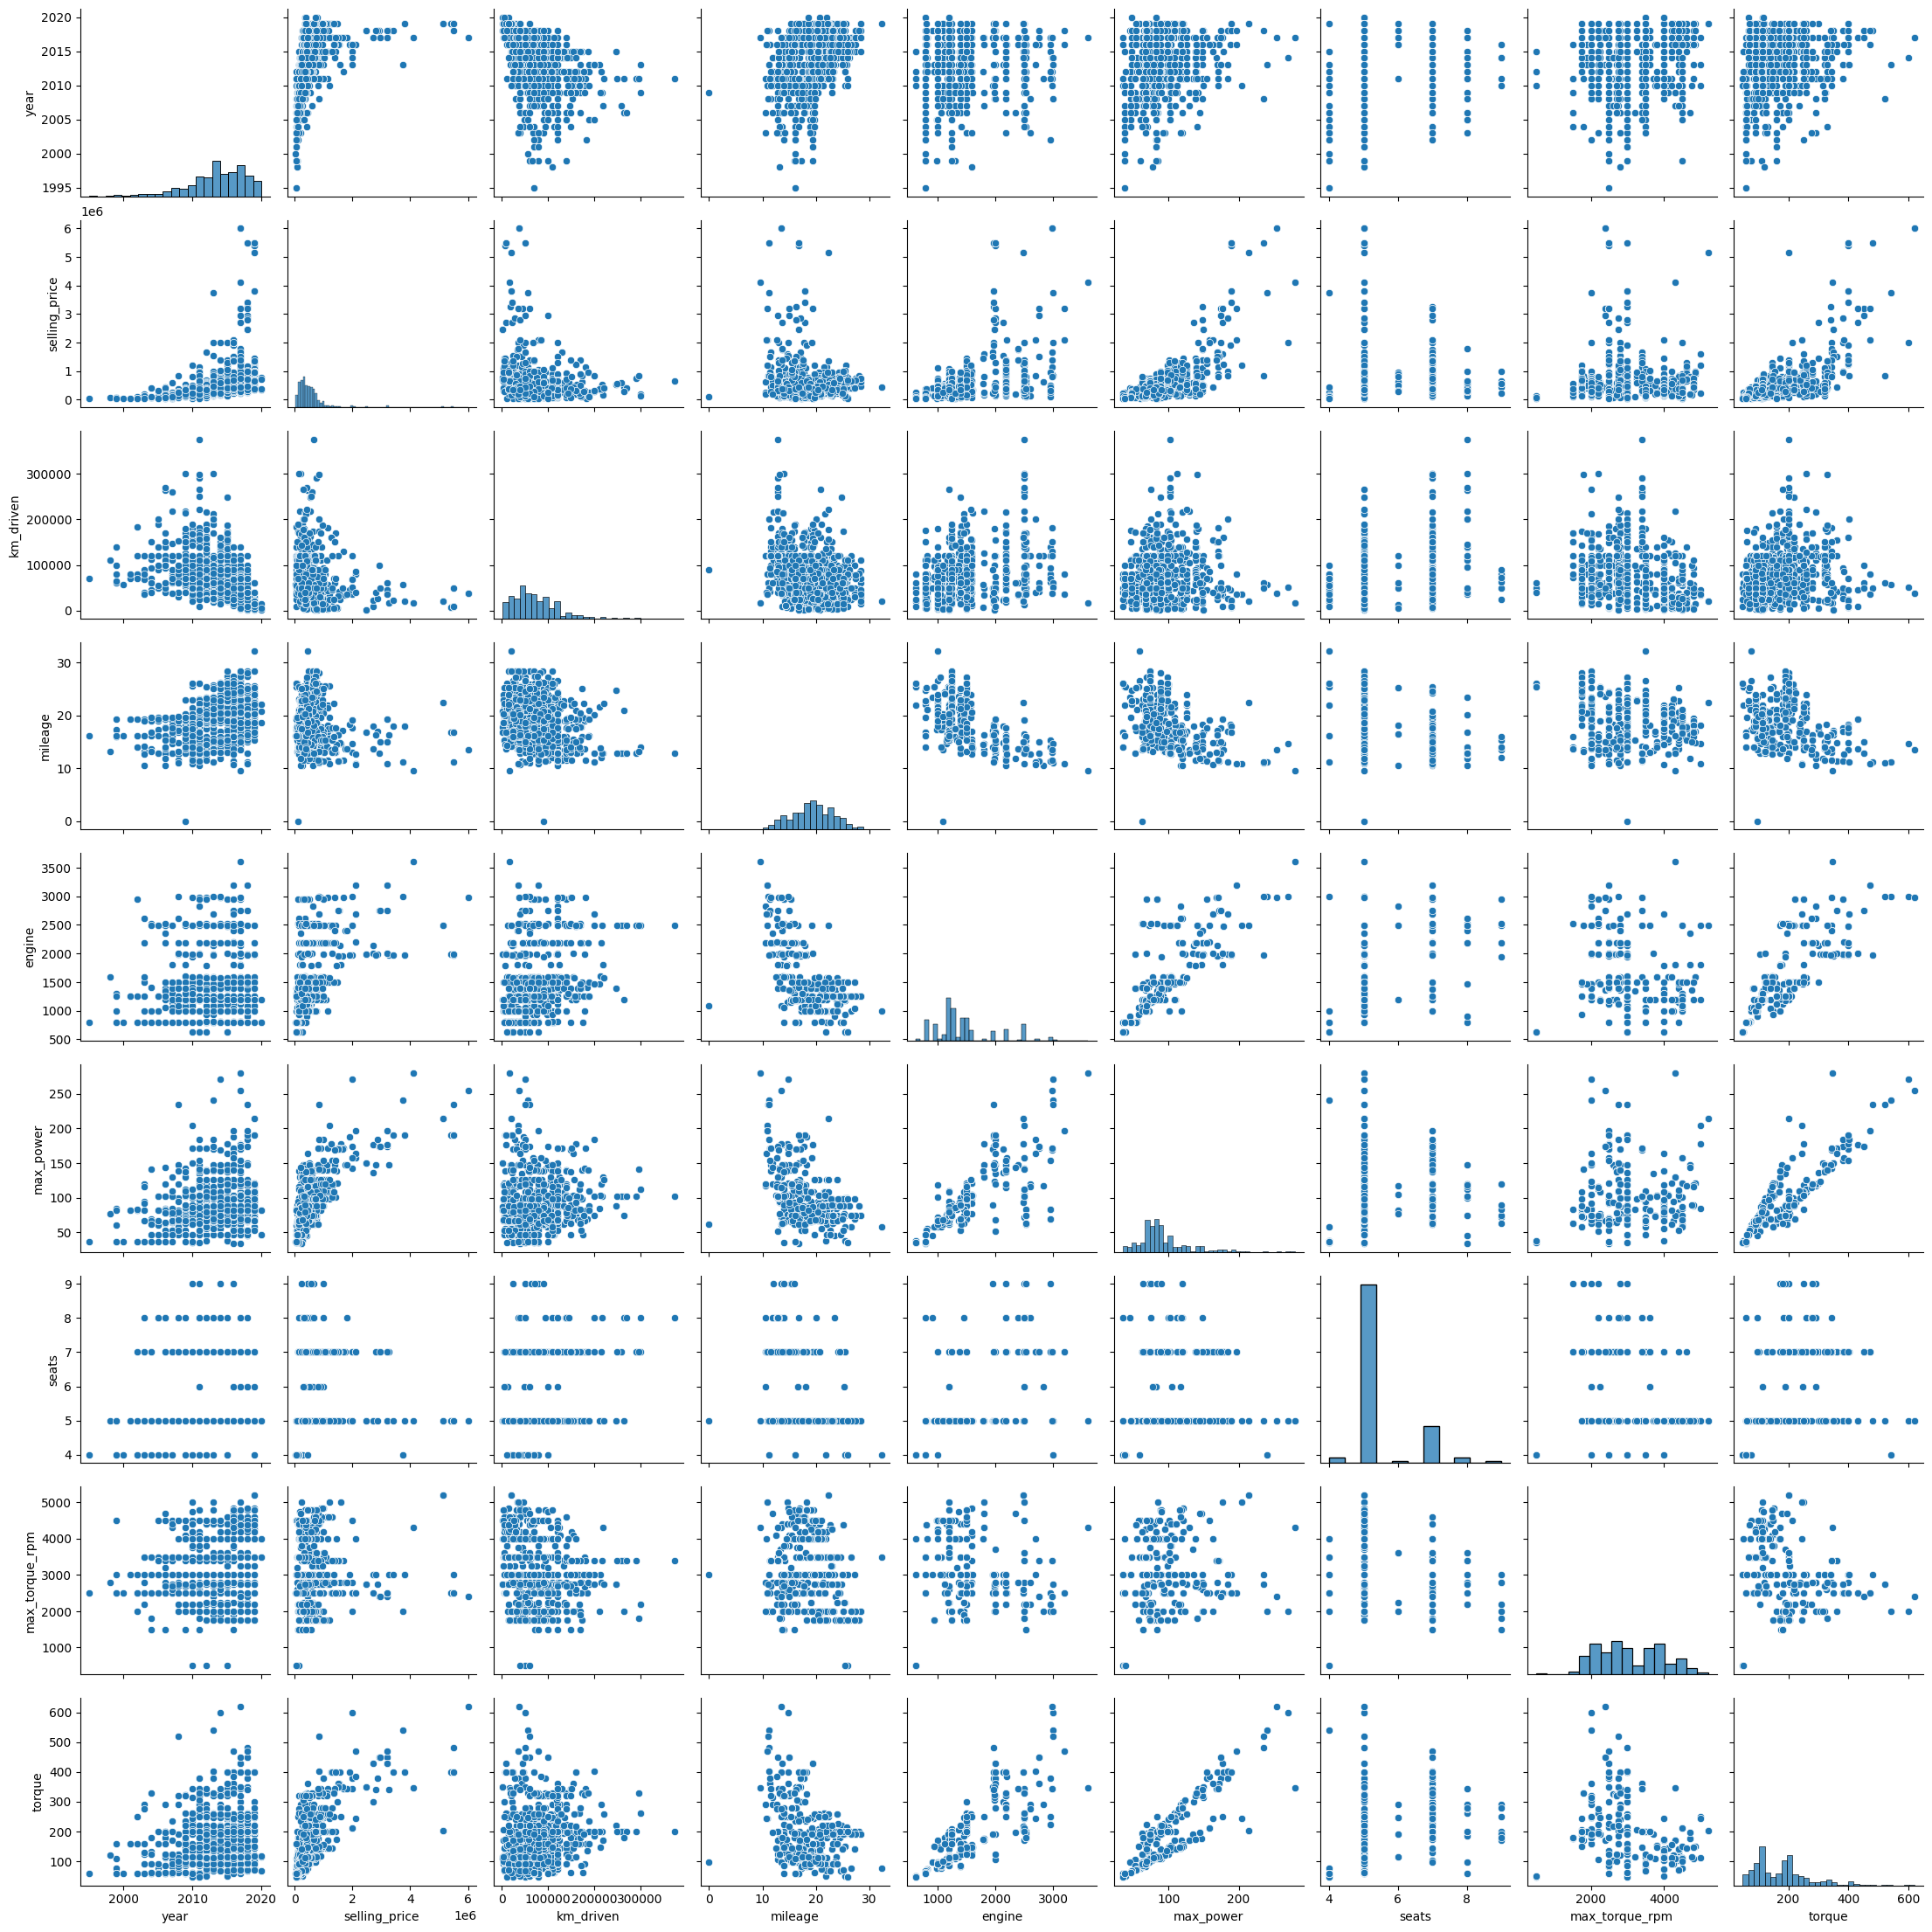

In [897]:
create_pairplot(df_test)

Зависимости,которые мы выявили на трейне, сохраняются на тесте

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

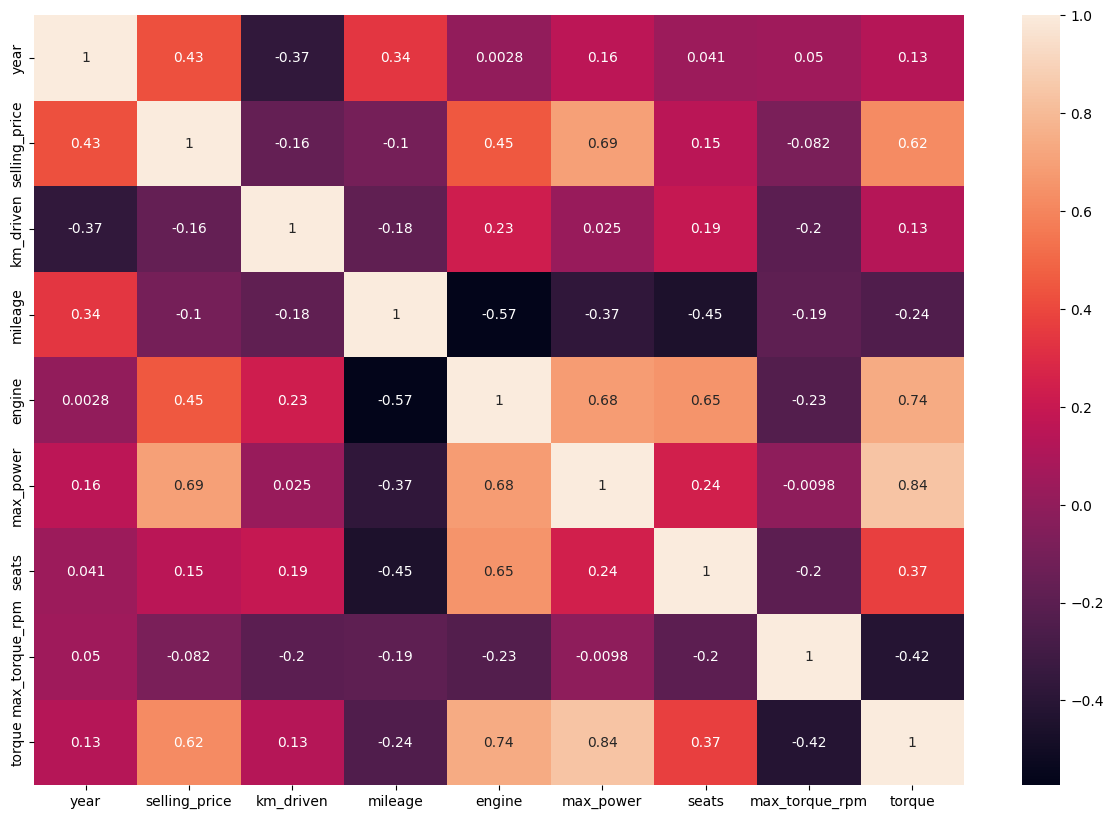

In [898]:
num_cols = df_train.columns[df_train.dtypes != 'object'].tolist()
plt.rcParams['figure.figsize'] = (15,10)
df_corr = df_train[num_cols].corr()
sns.heatmap(df_corr, annot = True)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Наименее всего скоррелированы между собой признаки, на пересечении которых мы видим фиолетовые ячейки (корреляция около нуля). Это, например, `max_torque_rpm` и `max_power`, `year` и `seats` и многие другие.

Наименьшее значение корреляции показывают признаки `year` и `engine` (0.0028)

Можем подкрепить свои визуальные заключения кодом:

In [899]:
min_corr = df_corr.abs().min().min()
row, _ = np.where(np.abs(df_corr.values) == min_corr)
index = df_corr.index[row]
print(f' Наименее скоррелированы между собой {index[0]} и {index[1]}. Корреляция - {min_corr:.4f}')

 Наименее скоррелированы между собой year и engine. Корреляция - 0.0028


Сильной положительной взаимосвязью обычно считают корреляцию > 0.7. Такая наблюдается только между признаками `torque` и `max_power` (0.84) и `torque` и `engine` (0.74).

Признаки `year` и `km_driven` имеют обратную зависимость. Т.е.при увеличении возраста машины (уменьшении года) количество пройденных км должно действительно увеличиваться. Но взаимосвязь слабая (корреляция -0.37).

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

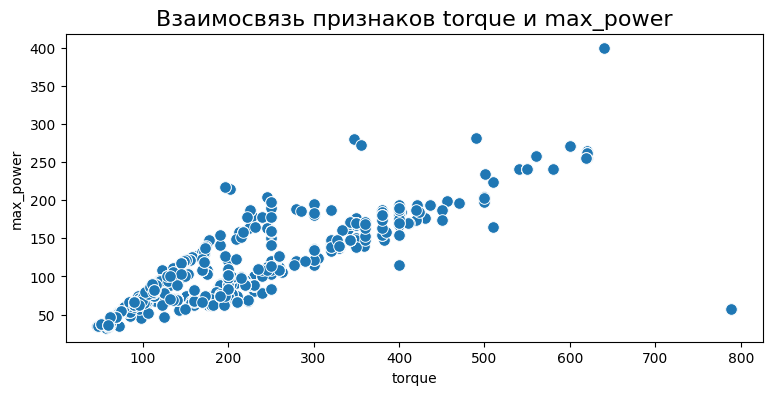

In [900]:
create_scatterplot(df_train, 'torque', 'max_power')

Видим, что с увеличением крутящего момента действительно растет сила двигателя.

Также есть пара выбросов: автомобиль, который имеет силу двигателя около 400 bhp, а также автомобиль, который при высоком крутящем моменте имеет слабый двигатель

In [901]:
df_train[df_train['torque'] > 630]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque_rpm,torque
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969,400.0,4,1740.0,640.0
770,Maruti Zen D,2003,85000,120000,Diesel,Individual,Manual,Third Owner,20.8,1527,58.0,5,2250.0,789.0
3449,Maruti Zen D,2002,120000,60000,Diesel,Individual,Manual,Second Owner,20.8,1527,58.0,5,2250.0,789.0
3730,Maruti Zen D,2006,80000,110000,Diesel,Individual,Manual,Second Owner,20.8,1527,58.0,5,2250.0,789.0


Что касается Volvo XC90 T8 Excellence BSIV, автомобиль действительно имеет такую мощность двигателя.

Для Maruti Zen D также указаны верные характеристики. 

Однако такие нетипичные для выборки значения могут влиять на качество предсказаний.



### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Нарисуем гистограммы для признаков и отметим на них границы выбросов

In [902]:
def histogram(df, feature, log_scale=False):
    #Строим гистограмму
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    test_data = df

    hist1 = sns.histplot(data=test_data, x=feature, ax=axes[0]);
    feature_data = df[feature]
    #Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
    feature_mean = feature_data.mean()
    feature_std = feature_data.std()
    lower_bound = feature_mean - 3*feature_std
    upper_bound = feature_mean + 3*feature_std
    lower_bound_2 = feature_mean - 4*feature_std
    upper_bound_2 = feature_mean + 4*feature_std
    axes[0].axvline(feature_mean, color='k', lw=2)
    axes[0].axvline(upper_bound, color='k', ls='--', lw=2)
    axes[0].axvline(lower_bound, color='k', ls='--', lw=2);
    axes[0].axvline(upper_bound_2, color='r', ls='--', lw=2)
    axes[0].axvline(lower_bound_2, color='r', ls='--', lw=2);

    rows_cnt = test_data[(test_data[feature] < lower_bound) | (test_data[feature] > upper_bound)].shape[0]
    rows_cnt_2 = test_data[(test_data[feature] < lower_bound_2) | (test_data[feature] > upper_bound_2)].shape[0]
    hist1.set_title(f"""
        3 std: {lower_bound:0.2f} - {upper_bound:0.2f}, {rows_cnt} outliers
        4 std: {lower_bound_2:0.2f} - {upper_bound_2:0.2f}, {rows_cnt_2} outliers
    """, fontsize=14)

    #Логарифмируем
    min_v = test_data[feature].min()
    log_feature = np.log(test_data[feature] - min_v + 1)
    #Строим гистограмму в логарифмическом масштабе
    hist2 = sns.histplot(data=log_feature, ax=axes[1]);
    #Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
    log_mean = log_feature.mean()
    log_std = log_feature.std()
    log_lower_bound = log_mean - 3*log_std
    log_upper_bound = log_mean + 3*log_std
    log_lower_bound_2 = log_mean - 4*log_std
    log_upper_bound_2 = log_mean + 4*log_std
    axes[1].axvline(log_mean, color='k', lw=2)
    axes[1].axvline(log_lower_bound, color='k', ls='--', lw=2)
    axes[1].axvline(log_upper_bound, color='k', ls='--', lw=2);
    axes[1].axvline(log_lower_bound_2, color='r', ls='--', lw=2)
    axes[1].axvline(log_upper_bound_2, color='r', ls='--', lw=2);

    log_rows_cnt = test_data[(test_data[feature] < (np.exp(log_lower_bound)-1)) | (test_data[feature] > (np.exp(log_upper_bound)-1))].shape[0]
    log_rows_cnt_2 = test_data[(test_data[feature] < (np.exp(log_lower_bound_2)-1)) | (test_data[feature] > (np.exp(log_upper_bound_2)-1))].shape[0]
    hist2.set_title(f"""
        3 std: {np.exp(log_lower_bound)+min_v-1:0.2f} - {np.exp(log_upper_bound)+min_v-1:0.2f}, {log_rows_cnt} outliers
        4 std: {np.exp(log_lower_bound_2)+min_v-1:0.2f} - {np.exp(log_upper_bound_2)+min_v-1:0.2f}, {log_rows_cnt_2} outliers
    """, fontsize=14)
    plt.show()

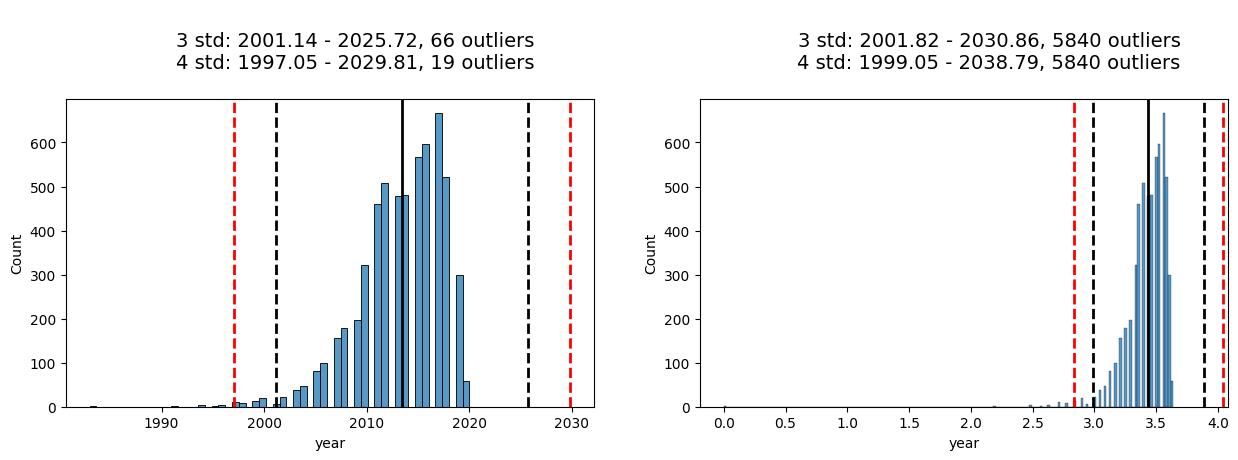

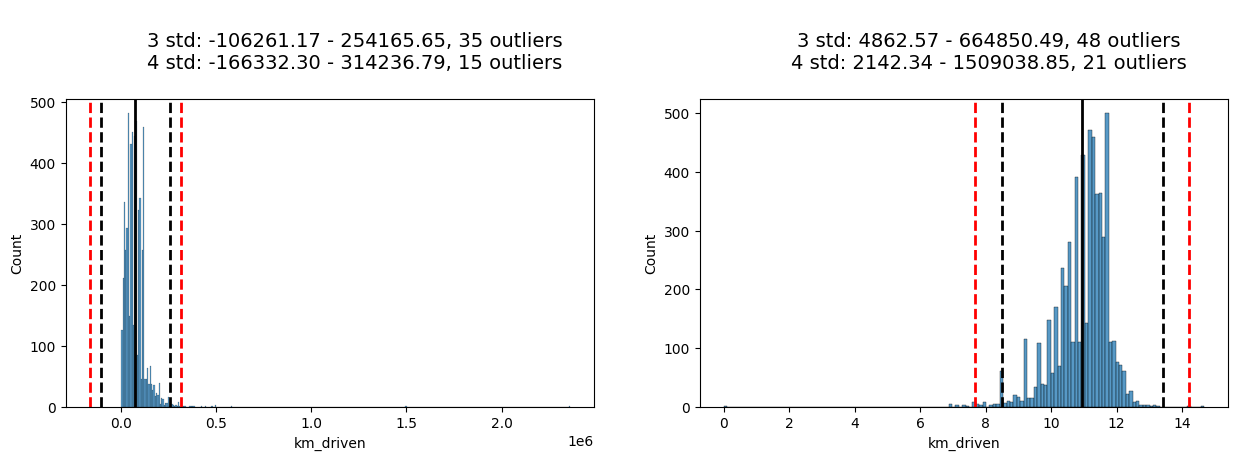

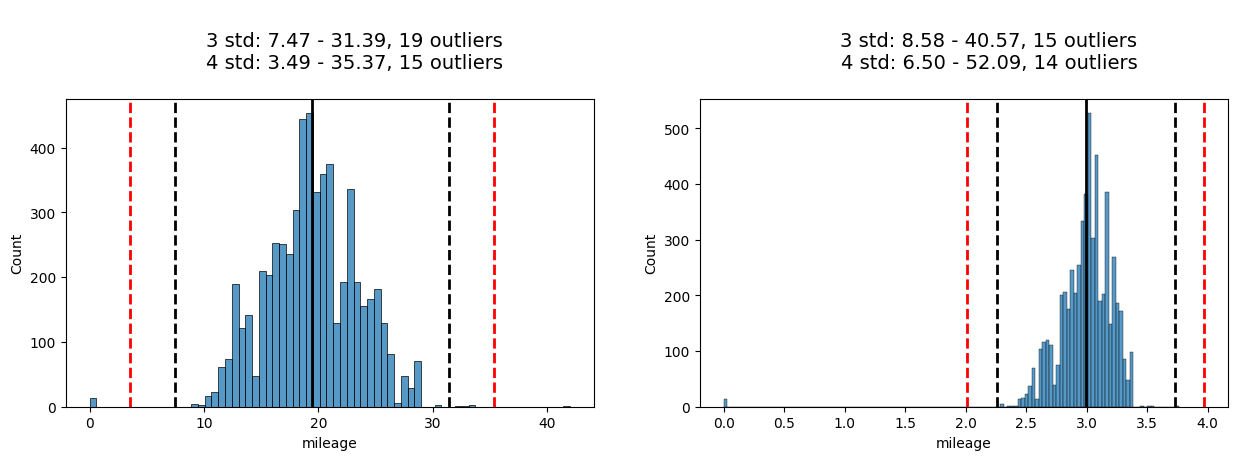

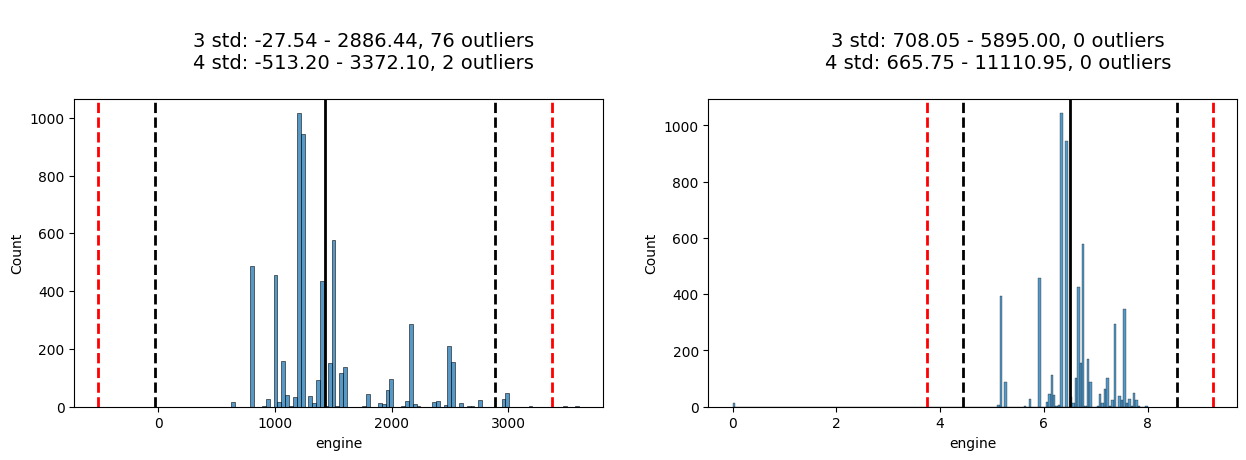

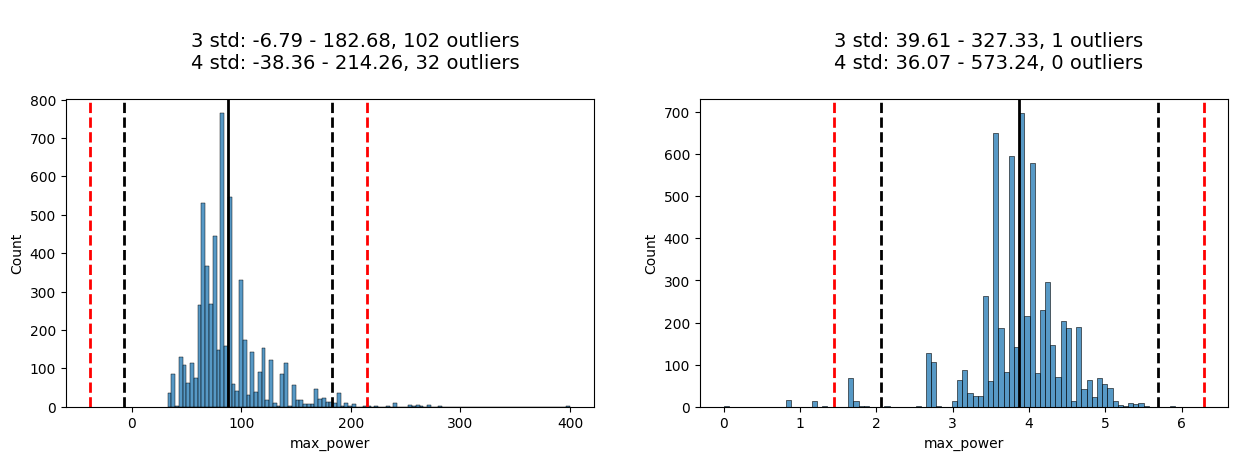

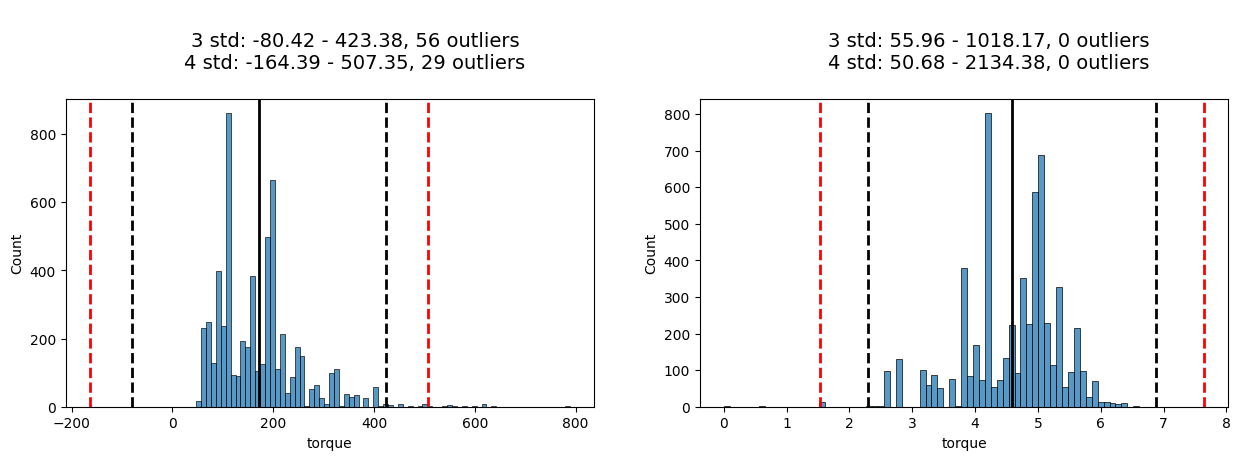

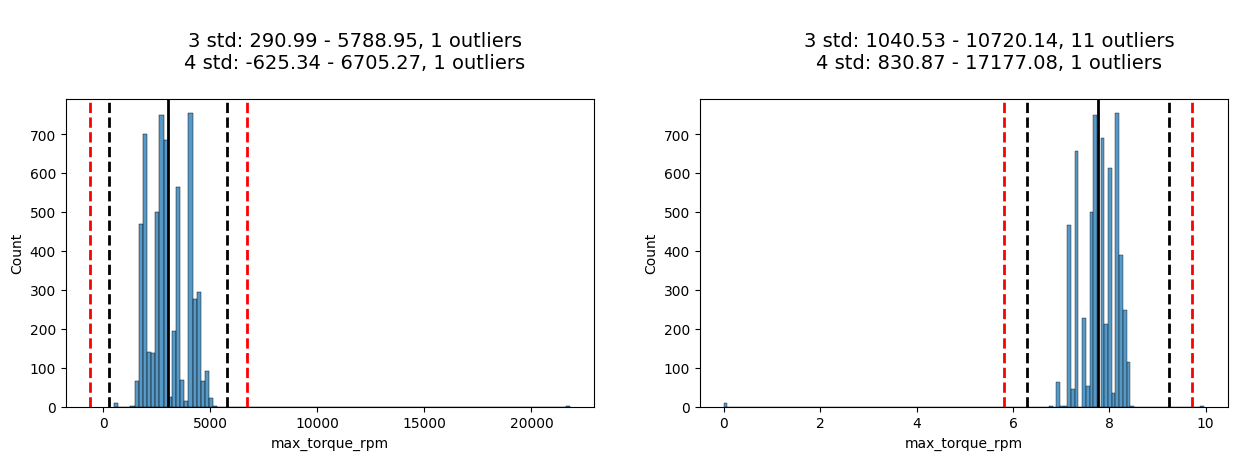

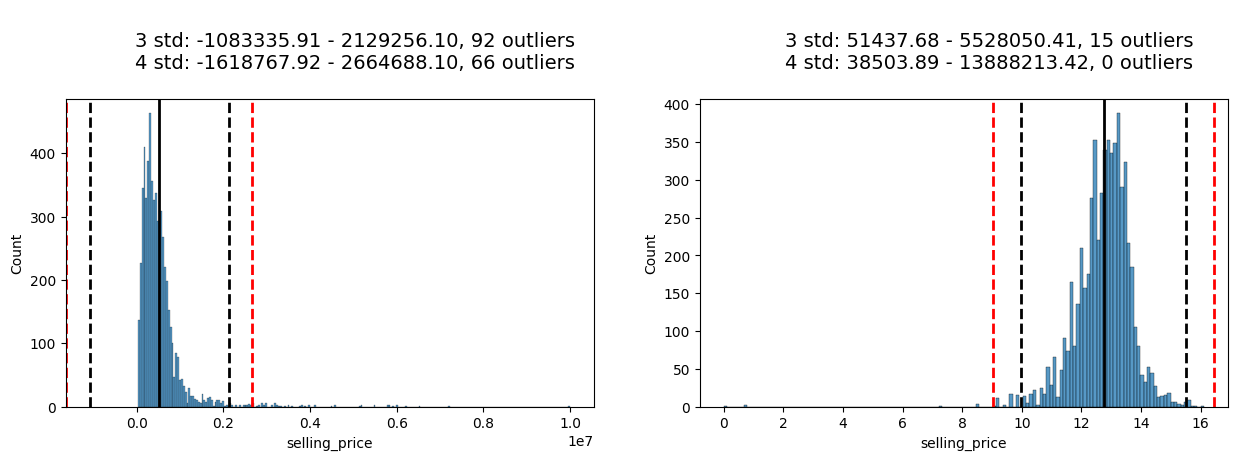

In [903]:
columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'selling_price']
for feature in columns:
    histogram(df_train, feature, log_scale=False)

Мы видим, что для некоторых признаков в данных имеются выбросы.

- `year` - автомобили, выпущенные до 1997 г., лежат в 4 стандартных отклонениях от среднего. А значение около 1983 г. вообще лежит обособленно от остальных значений;
- `km_driven` - многие машины расчитаны на пробег около 300 км. Пробег более 500 тыс, а тем более пробег в 2000 тыс - это довольноочень большие числа. Нужно анализировать тип автомобиля;
- `mileage` - расход топлива около нуля - это, вероятно, какая-то ошибка в данных. Либо электромобили. Нужно анализировать данные;
- `max_power`- мощность двигателя около 400 в наших данных кажется выбросом, хотя на практике такие автомобили существуют;
max_torque_rpm - это количество оборотов в минуту (об/мин), при которых достигается максимальный крутящий момент. Значения свыше 5700 являются редкими для наших данных и находятся на расстоянии большем 4х стандартных отклонений;
- `selling_price` - на расстоянии 4х стандартных отклонений лежат автомобили со стоимостью свыше 3 млн. Возможно, мы не будем удалять все, а повысим границу, чтобы не лишать модель возможности предсказывать стоимость дорогих автомобилей.

Посмотрим на зависимость крутящего момента и стоимости автомобилей более детально

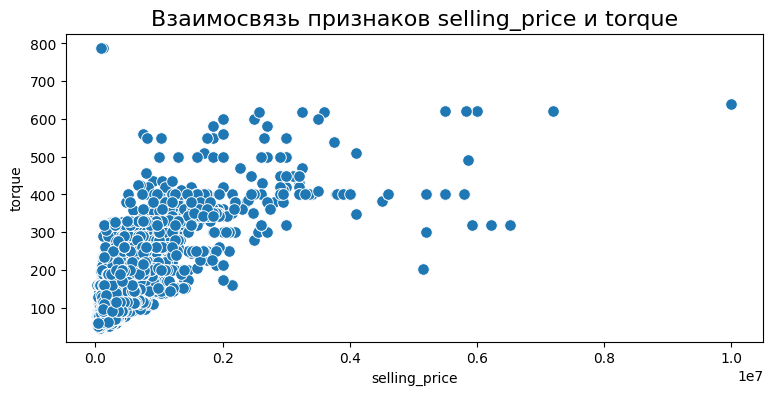

In [904]:
create_scatterplot(df_train, 'selling_price', 'torque')

Есть нетипичные значения с высоким крутящим моментом и низкой ценой. Проверим, не ошибка ли это

In [905]:
df_train[(df_train['selling_price'] < 200000) & (df_train['torque'] > 700)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque_rpm,torque
770,Maruti Zen D,2003,85000,120000,Diesel,Individual,Manual,Third Owner,20.8,1527,58.0,5,2250.0,789.0
3449,Maruti Zen D,2002,120000,60000,Diesel,Individual,Manual,Second Owner,20.8,1527,58.0,5,2250.0,789.0
3730,Maruti Zen D,2006,80000,110000,Diesel,Individual,Manual,Second Owner,20.8,1527,58.0,5,2250.0,789.0


В других источниках максимальный крутящий момент этого автомобиля равен 78@2250. Значит, в наших данных ошибка (ошибка в первоначальных данных, а не при преобразовании колонки torque). Удалим позднее эти строки.

Посмотрим, как зависит стоимость автомобиля от категориальных признаков

In [906]:
columns = ['fuel', 'seller_type', 'transmission']
for column in columns:
    creating_bar(df_train, column)

Видим, что самые дорогие - дизельные автомобили. А самые низкие цены на автомобили на газовом топливе (cng/lpg)

Средняя стоимость автомобилей у обычных дилеров выше, чем у сертифицированных. А самые низкие цены у индивидуальных продавцов.

Автомобили с ручной коробкой передач в наших данных дешевле автомобилей с автоматической.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [907]:
y_train = df_train['selling_price']
columns_to_delete = list(df_train.select_dtypes(include='object').columns)
columns_to_delete.extend(['selling_price', 'torque', 'max_torque_rpm'])
X_train = df_train.drop(columns_to_delete, axis=1)

In [908]:
assert X_train.shape == (5840, 6)

In [909]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns_to_delete, axis=1)

In [910]:
X_test.shape

(1000, 6)

In [911]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [912]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

def print_metrics(y_train, y_test, y_train_pred, y_test_pred):
    print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
    print('MSE train: %.0f \n' % MSE(y_train, y_train_pred))
    print('R2 test: %.3f' % r2_score(y_test, y_test_pred))
    print('MSE test: %.0f' % MSE(y_test, y_test_pred))

In [913]:
from sklearn.linear_model import LinearRegression

lr_numeric = LinearRegression()
lr_numeric.fit(X_train, y_train)
y_train_pred = lr_numeric.predict(X_train)
y_test_pred = lr_numeric.predict(X_test)

print_metrics(y_train, y_test, y_train_pred, y_test_pred)

R2 train: 0.593
MSE train: 116601673169 

R2 test: 0.595
MSE test: 233002359161


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [914]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_numeric_scaled = LinearRegression()
lr_numeric_scaled.fit(X_train_scaled, y_train)
y_train_pred = lr_numeric_scaled.predict(X_train_scaled)
y_test_pred = lr_numeric_scaled.predict(X_test_scaled)

print_metrics(y_train, y_test, y_train_pred, y_test_pred)

R2 train: 0.593
MSE train: 116601673169 

R2 test: 0.595
MSE test: 233002359161


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [915]:
pd.DataFrame({'column': X_train.columns, 'coef': lr_numeric_scaled.coef_}).sort_values('coef')

,column,coef
1,km_driven,-44066.180213
5,seats,-22159.187867
2,mileage,29319.181026
3,engine,59324.980365
0,year,152247.330869
4,max_power,324496.857821


Наиболее информативным для предсказания цены оказался признак `max_power`. У этого признака была максимальная корреляция с целевой переменной, поэтому это было предсказуемо

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [916]:
from sklearn.linear_model import Lasso

lasso_lr = Lasso(alpha=0.1)
lasso_lr.fit(X_train_scaled, y_train)
y_train_pred = lasso_lr.predict(X_train_scaled)
y_test_pred = lasso_lr.predict(X_test_scaled)

print_metrics(y_train, y_test, y_train_pred, y_test_pred)

R2 train: 0.593
MSE train: 116601673169 

R2 test: 0.595
MSE test: 233002426181


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [917]:
pd.DataFrame({'column': X_train.columns, 'coef': lasso_lr.coef_}).sort_values('coef')

,column,coef
1,km_driven,-44066.066747
5,seats,-22158.899950
2,mileage,29318.991119
3,engine,59324.495123
0,year,152247.314037
4,max_power,324496.946979


Веса не занулились. Результат не улучшился при использоовании регуляризации с параметрами по умолчанию

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

При таком диапазоне значений мы можем достигнуть значений метрик с параметрами по умолчанию:

In [918]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(0, 10, 0.01)}
grid_search_0_10 = GridSearchCV(
    estimator=Lasso(),
    param_grid=param_grid,
    cv=10,
    n_jobs = -1
)
%time grid_search_0_10.fit(X_train_scaled, y_train)
y_train_pred = grid_search_0_10.predict(X_train_scaled)
y_test_pred = grid_search_0_10.predict(X_test_scaled)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_0_10.best_params_))

CPU times: total: 9.98 s
Wall time: 39.9 s
R2 train: 0.593
MSE train: 116601674177 

R2 test: 0.595
MSE test: 233009064876
Наилучшие значения гиперпараметров: {'alpha': 9.99}


Если расширить диапазон, качетсво падает, т.к. GridSearchCV проходит по сетке с большим шагом и не находит лучшее решение.

In [919]:
param_grid = {'alpha': np.logspace(-4, 4, 100)}
grid_search_log = GridSearchCV(
    estimator=Lasso(),
    param_grid=param_grid,
    cv=10,
    n_jobs = -1
)
%time grid_search_log.fit(X_train_scaled, y_train)
y_train_pred = grid_search_log.predict(X_train_scaled)
y_test_pred = grid_search_log.predict(X_test_scaled)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_log.best_params_))

CPU times: total: 1.27 s
Wall time: 3.94 s
R2 train: 0.590
MSE train: 117441461162 

R2 test: 0.582
MSE test: 240111592652
Наилучшие значения гиперпараметров: {'alpha': 10000.0}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Грид-серч обучает количество моделей, равное количеству вариантов параметров * количество фолдов. Получается, в нашем случае:

```python
param_grid = {'alpha': np.logspace(-4, 4, 100)}
grid_search_1 = GridSearchCV(
    estimator=Lasso(),
    param_grid=param_grid,
    cv=10,
    n_jobs = -1
)```

обучается 1000 * 10 = 10000 моделей. На больших объемах данных мы бы, скорее всего, не смогли себе позволить такое количество итераций.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Нам не удалось повысить качество модели с помощью регуляризации даже после перебора параметров. Лучший коэффициент регуляризации - 9.99. При таком параметре веса не зануляются

In [920]:
pd.DataFrame({'column': X_train.columns, 'coef': grid_search_0_10.best_estimator_.coef_}).sort_values('coef')

,column,coef
1,km_driven,-44054.988805
5,seats,-22130.231682
2,mileage,29300.767006
3,engine,59276.604383
0,year,152245.159410
4,max_power,324505.932921


Но занулился вес признака `seats` (количество сидений) у GridSearchCV, который отработал на более широком диапазоне параметров

In [921]:
pd.DataFrame({'column': X_train.columns, 'coef': grid_search_log.best_estimator_.coef_}).sort_values('coef')

,column,coef
1,km_driven,-32582.589939
5,seats,-0.000000
2,mileage,9568.217017
3,engine,16792.194689
0,year,151476.096232
4,max_power,330545.213659


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [922]:
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': np.arange(0, 12, 0.1), 'l1_ratio': np.arange(0, 1, 0.1)}
grid_search_elastic = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param_grid,
    cv=10,
    n_jobs = -1
)
%time grid_search_elastic.fit(X_train_scaled, y_train)
y_train_pred = grid_search_elastic.predict(X_train_scaled)
y_test_pred = grid_search_elastic.predict(X_test_scaled)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_elastic.best_params_))

CPU times: total: 13.9 s
Wall time: 1min 29s
R2 train: 0.585
MSE train: 118839894935 

R2 test: 0.562
MSE test: 251729907373
Наилучшие значения гиперпараметров: {'alpha': 1.5, 'l1_ratio': 0.9}


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Наилучшие значения гиперпараметров: 
```python 
{'alpha': 1.5, 'l1_ratio': 0.9}
```

Однако качество модели не улучшилось

Предлагаем вам оставить попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

Обучим модель на признаках, предлагаемых в первоначальном задании (без добавленных `torque` и `max_torque_rpm`)

In [923]:
columns_to_drop = ['selling_price', 'name', 'torque', 'max_torque_rpm']
X_train_cat = df_train.drop(columns_to_drop, axis=1)
X_test_cat = df_test.drop(columns_to_drop, axis=1)

In [924]:
assert X_train_cat.shape == (5840, 10)

In [925]:
X_train_cat.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5


In [926]:
obj_describe = X_train_cat.describe(include='object')
obj_describe

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [927]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

def get_df_scaled(x_train, x_test, columns):

    scaler = MinMaxScaler()
    scaler.fit(x_train[columns])

    train_scaled = scaler.transform(x_train[columns])
    test_scaled = scaler.transform(x_test[columns])

    x_train_scaled = pd.DataFrame(train_scaled, columns=columns)
    x_train = pd.concat([x_train.drop(columns=columns), x_train_scaled], axis=1)

    x_test_scaled = pd.DataFrame(test_scaled, columns=columns)
    x_test = pd.concat([x_test.drop(columns=columns), x_test_scaled], axis=1)

    return x_train, x_test, scaler


def get_df_with_dummies(x_train, x_test, columns):
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    encoder.fit(x_train[columns])

    train_encoded = encoder.transform(x_train[columns])
    test_encoded = encoder.transform(x_test[columns])

    x_train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(columns))
    x_train = pd.concat([x_train, x_train_encoded], axis=1).drop(columns=columns)

    x_test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(columns))
    x_test = pd.concat([x_test, x_test_encoded], axis=1).drop(columns=columns)

    return x_train, x_test, encoder

def get_df_with_binary(x_train, x_test, columns):
    bin_enc = BinaryEncoder(cols=columns)

    data_train_bin = bin_enc.fit_transform(x_train[columns])
    data_test_bin = bin_enc.transform(x_test[columns])

    x_train = pd.concat([x_train, data_train_bin], axis=1)
    x_test = pd.concat([x_test, data_test_bin], axis=1)

    x_train.drop(columns, axis=1, inplace=True)
    x_test.drop(columns, axis=1, inplace=True)
    return x_train, x_test, bin_enc

In [928]:
cat_columns = list(obj_describe.columns)
cat_columns.append('seats')

num_columns = list(set(X_train_cat.columns) - set(cat_columns))

X_train_cat, X_test_cat, _ = get_df_scaled(X_train_cat, X_test_cat, num_columns)
X_train_cat, X_test_cat, _ = get_df_with_dummies(X_train_cat, X_test_cat, cat_columns)
X_train_cat.head(2)

,engine,max_power,mileage,year,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.209396,0.112200,0.557143,0.837838,0.061640,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.293289,0.192593,0.503333,0.837838,0.050837,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [929]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-5, 5, 100)}
grid_search_cat = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs = -1
)
%time grid_search_cat.fit(X_train_cat, y_train)
y_train_pred = grid_search_cat.predict(X_train_cat)
y_test_pred = grid_search_cat.predict(X_test_cat)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_cat.best_params_))

CPU times: total: 2.91 s
Wall time: 10.9 s
R2 train: 0.658
MSE train: 97920644571 

R2 test: 0.629
MSE test: 213096607604
Наилучшие значения гиперпараметров: {'alpha': 3.593813663804626}


Метрика R2 выросла. Значит, использование категориальных переменных полезно для прогнозирования стоимости. 

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Проверим, влияют ли на результат наши добавленные признаки `torque` и `max_torque_rpm`

In [930]:
columns_to_drop = ['selling_price', 'name']
X_train_cat = df_train.drop(columns_to_drop, axis=1)
X_test_cat = df_test.drop(columns_to_drop, axis=1)

cat_columns = list(X_train_cat.columns[X_train_cat.dtypes == 'object'].tolist())
cat_columns.append('seats')

num_columns = list(set(X_train_cat.columns) - set(cat_columns))

X_train_cat, X_test_cat, _ = get_df_scaled(X_train_cat, X_test_cat, num_columns)
X_train_cat, X_test_cat, _ = get_df_with_dummies(X_train_cat, X_test_cat, cat_columns)

param_grid = {'alpha': np.logspace(-5, 5, 100)}
grid_search_torque = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs = -1
)
%time grid_search_torque.fit(X_train_cat, y_train)
y_train_pred = grid_search_torque.predict(X_train_cat)
y_test_pred = grid_search_torque.predict(X_test_cat)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_torque.best_params_))

CPU times: total: 2.78 s
Wall time: 8.29 s
R2 train: 0.665
MSE train: 95998494586 

R2 test: 0.637
MSE test: 208902328568
Наилучшие значения гиперпараметров: {'alpha': 4.534878508128582}


Метрика R2 увеличилась, но несущественно.

Попробуем извлесь полезную информацию из названия автомобиля

`brand`

In [931]:
df_train['brand'] = df_train['name'].apply(lambda x: x.split()[0])
df_test['brand'] = df_test['name'].apply(lambda x: x.split()[0])

In [932]:
df_train['brand'].value_counts().nlargest(10)

Maruti        1804
Hyundai       1058
Mahindra       611
Tata           534
Toyota         309
Ford           308
Honda          308
Chevrolet      188
Renault        171
Volkswagen     153
Name: brand, dtype: int64

In [933]:
columns_to_drop = ['selling_price', 'name']
X_train_cat = df_train.drop(columns_to_drop, axis=1)
X_test_cat = df_test.drop(columns_to_drop, axis=1)

cat_columns = list(X_train_cat.columns[X_train_cat.dtypes == 'object'].tolist())
cat_columns.append('seats')

num_columns = list(set(X_train_cat.columns) - set(cat_columns))

# масштабирование негативно влияет на качетсво модели почему-то
# X_train_cat, X_test_cat, _ = get_df_scaled(X_train_cat, X_test_cat, num_columns)
X_train_cat, X_test_cat, _ = get_df_with_dummies(X_train_cat, X_test_cat, cat_columns)

param_grid = {'alpha': np.logspace(-5, 5, 100)}
grid_search_brand = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs = -1
)
%time grid_search_brand.fit(X_train_cat, y_train)
y_train_pred = grid_search_brand.predict(X_train_cat)
y_test_pred = grid_search_brand.predict(X_test_cat)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_brand.best_params_))

c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros



CPU times: total: 2.39 s
Wall time: 12.9 s
R2 train: 0.768
MSE train: 66359380285 

R2 test: 0.774
MSE test: 129640178225
Наилучшие значения гиперпараметров: {'alpha': 2.2570197196339215}


Добавление брэнда существенно повлияло на качество модели.

`model`, `emissions_level`, `equipment_level`

In [934]:
def get_number(emissions_level):
    levels = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
    return levels.get(emissions_level, 0)

def get_features_from_name(df):
    df['model'] = df['name'].apply(lambda x: x.split()[1])
    df['emissions_level'] = df['name'].str.extract(' BS ?-?([IV12345]+)')
    df['emissions_level'] = df['emissions_level'].apply(get_number)
    df['equipment_level'] = df['name'].str.extract('(EX|DX|LX|LTD|GT|TDI|VDI|ZDI|SE)')

get_features_from_name(df_train)
get_features_from_name(df_test)

In [935]:
creating_bar(df_train, 'emissions_level')

Видна зависимость стоимости от уровня экологичности автомобиля. Ноль мы присвоили всем без уровня

In [936]:
creating_bar(df_train, 'equipment_level')

In [937]:
columns_to_drop = ['selling_price', 'name']
X_train_cat = df_train.drop(columns_to_drop, axis=1)
X_test_cat = df_test.drop(columns_to_drop, axis=1)

cat_columns = list(X_train_cat.columns[X_train_cat.dtypes == 'object'].tolist())
cat_columns.append('seats')
cat_columns.append('emissions_level')
cat_columns.append('equipment_level')
cat_columns.remove('model')

bin_columns = ['model']

num_columns = list(set(X_train_cat.columns) - set(cat_columns) - set(bin_columns))

# масштабирование негативно влияет на качетсво модели почему-то
# X_train_cat, X_test_cat, _ = get_df_scaled(X_train_cat, X_test_cat, num_columns)
X_train_cat, X_test_cat, _ = get_df_with_dummies(X_train_cat, X_test_cat, cat_columns)
X_train_cat, X_test_cat, _ = get_df_with_binary(X_train_cat, X_test_cat, bin_columns)

param_grid = {'alpha': np.logspace(-5, 5, 100)}
grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs = -1
)
%time grid_search.fit(X_train_cat, y_train)
y_train_pred = grid_search.predict(X_train_cat)
y_test_pred = grid_search.predict(X_test_cat)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros



CPU times: total: 4.14 s
Wall time: 18.8 s
R2 train: 0.780
MSE train: 62968646271 

R2 test: 0.782
MSE test: 125481128274
Наилучшие значения гиперпараметров: {'alpha': 1.7886495290574351}


После добавления новых характеристик автомобиля, полученных из наименования, качество улучшилось незначительно

In [938]:
def add_columns(df):
    df['age'] = 2024 - df['year']
    df['age_reverse'] = 1/df['age']**0.5
    df['km_driven_reverse'] = 1/df['km_driven']**0.5

add_columns(df_train)
add_columns(df_test)

In [945]:
columns_to_drop = ['selling_price', 'name', 'year', 'age']
X_train_cat = df_train.drop(columns_to_drop, axis=1)
X_test_cat = df_test.drop(columns_to_drop, axis=1)

cat_columns = list(X_train_cat.columns[X_train_cat.dtypes == 'object'].tolist())
cat_columns.append('seats')
cat_columns.append('emissions_level')
cat_columns.append('equipment_level')
cat_columns.remove('model')

bin_columns = ['model']

num_columns = list(set(X_train_cat.columns) - set(cat_columns) - set(bin_columns))

# масштабирование негативно влияет на качетсво модели почему-то
# X_train_cat, X_test_cat, _ = get_df_scaled(X_train_cat, X_test_cat, num_columns)
X_train_cat, X_test_cat, _ = get_df_with_dummies(X_train_cat, X_test_cat, cat_columns)
X_train_cat, X_test_cat, _ = get_df_with_binary(X_train_cat, X_test_cat, bin_columns)

param_grid = {'alpha': np.logspace(-5, 5, 100)}
grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs = -1
)
%time grid_search.fit(X_train_cat, y_train)
y_train_pred = grid_search.predict(X_train_cat)
y_test_pred = grid_search.predict(X_test_cat)
print_metrics(y_train, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros



CPU times: total: 4.14 s
Wall time: 20.1 s
R2 train: 0.794
MSE train: 58968360646 

R2 test: 0.796
MSE test: 117210842602
Наилучшие значения гиперпараметров: {'alpha': 0.7054802310718645}


Попробуем удалить некоторые выбросы

In [946]:
columns_to_drop = ['selling_price', 'name', 'year', 'age', 'engine']
X_train_cat = df_train.drop(columns_to_drop, axis=1)
X_test_cat = df_test.drop(columns_to_drop, axis=1)

X_train_cat['selling_price'] = y_train

Мы видела на графике выше, что в данных много выбросов. Однако при попытках удалить часть из них, модель начинает переобучаться, метрика на трейне растет, а на тесте остается неизменной или падает. 

Оставила минимальный набор выбросов для примера, который не ухудшает модель.

In [947]:
X_train_cat = X_train_cat[X_train_cat['km_driven'] <= 315000]
X_train_cat = X_train_cat[(X_train_cat['max_torque_rpm'] <= 6000)]
X_train_cat = X_train_cat[X_train_cat['torque'] <= 700]
X_train_cat = X_train_cat[X_train_cat['age_reverse'] >= 0.16]
X_train_cat = X_train_cat.reset_index()
X_test_cat = X_test_cat.reset_index()
y_train_cat = X_train_cat['selling_price']

In [948]:
X_train_cat.drop('selling_price', axis=1, inplace=True)

cat_columns = list(X_train_cat.columns[X_train_cat.dtypes == 'object'].tolist())
cat_columns.append('seats')
cat_columns.append('emissions_level')
cat_columns.append('equipment_level')
cat_columns.remove('model')

bin_columns = ['model']

num_columns = list(set(X_train_cat.columns) - set(cat_columns) - set(bin_columns))

X_train_cat, X_test_cat, encoder = get_df_with_dummies(X_train_cat, X_test_cat, cat_columns)
X_train_cat, X_test_cat, bin_enc = get_df_with_binary(X_train_cat, X_test_cat, bin_columns)

param_grid = {'alpha': np.logspace(-5, 5, 100)}
grid_search_outliers = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs = -1
)
%time grid_search_outliers.fit(X_train_cat, y_train_cat)
y_train_pred = grid_search_outliers.predict(X_train_cat)
y_test_pred = grid_search_outliers.predict(X_test_cat)
print_metrics(y_train_cat, y_test, y_train_pred, y_test_pred)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_outliers.best_params_))

c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros



CPU times: total: 3.98 s
Wall time: 22 s
R2 train: 0.796
MSE train: 58658523400 

R2 test: 0.796
MSE test: 117427598783
Наилучшие значения гиперпараметров: {'alpha': 0.8902150854450392}


Сохраним данные модели в файл для последующего использования в сервисе

In [943]:
import pickle

model_params = grid_search.get_params()
model_weights = grid_search.best_estimator_.coef_
model_intercept = grid_search.best_estimator_.intercept_
with open('model.pkl', 'wb') as f:
    pickle.dump({
        'params': grid_search.best_params_,
        'weights': model_weights,
        'intercept': model_intercept,
        'encoder': encoder,
        'bin_encoder': bin_enc
    }, f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [953]:
def business_metrics(y_true, y_pred):
    threshold = 0.1

    lower_bounds = (1 - threshold) * y_true
    upper_bounds = (1 + threshold) * y_true

    within_range = (y_pred >= lower_bounds) & (y_pred <= upper_bounds)

    return sum(within_range) / len(within_range) * 100

print(f'Точность на трейне: {business_metrics(y_train_cat, y_train_pred):.2f}%')
print(f'Точность на тесте: {business_metrics(y_test, y_test_pred):.2f}%')

Точность на трейне: 24.93%
Точность на тесте: 28.40%


Бизнес-метрика не высока. Нужно улучшать модель.

Попробовать иначе заполнить пропущенные значения. Проанализировать записи, где модель хуже всего угадывает.

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Сервис реализован в файле [main.py](main.py)

**Предсказание стоимости одного автомобиля (`predict_item`):**

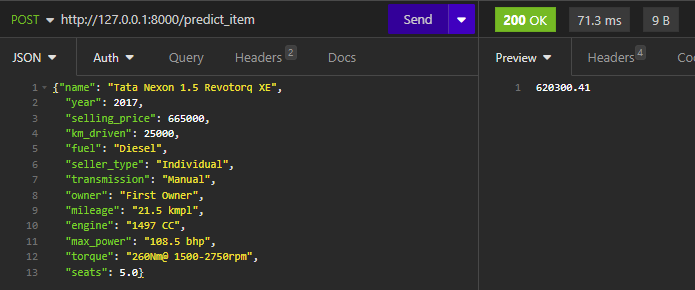

**Предсказание стоимости нескольких автомобилей (`predict_items`):**

Описание входных параметров для view predict_items в файле и в описании задачи отличались, сделала, как в файле.

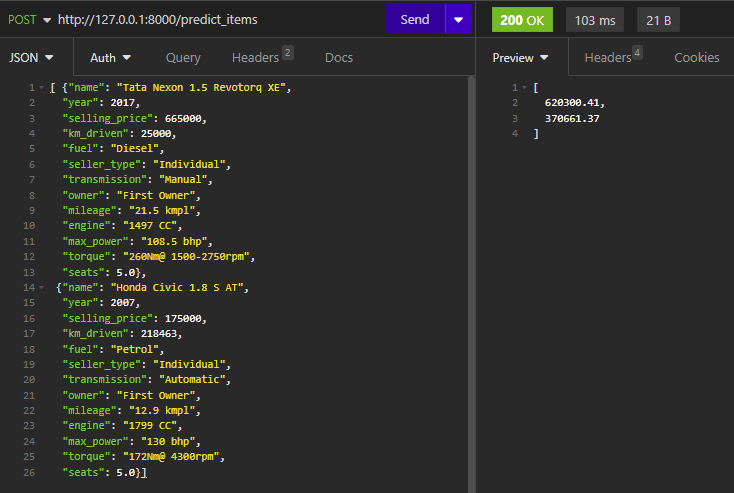

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link